<a href="https://colab.research.google.com/github/Coding-bot007/machine-learning/blob/main/Machine_Learning_Model_to_Predict_Play_Store_App_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Machine Learning Model to Predict App Ratings based on Features

## Problem Statement:

The exponential growth of android applications due to surge in smartphone users has always provided a special previlege for hte consumers to choose between multiple apps to download. Irrespective of domain and industry, every institution has devised strategies to acquire consumers targeting ads via android application like Youtube, Instagram and many more.

Diving into the consumer or user's perspective on what application to choose amongst the thousands listed on Google Play Store, we have built a machine learning model to predict app ratings based on respective features. The model eliminates the approach of user selecting the application purely based on user ratings and introduces a more efficient way of presenting the profile of android applications based on features.

Implementation of this model significantly impacts developers and users by enabling continuous improvement of features that contribute largely to great user experience. On the other hand, user's will get a deep dive into apps' features before actually downloading the application.

## Dataset collection and loading

In [ ]:
#importing necessary libraries for the project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn

In [ ]:
#loading the dataset to the google via drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#creating dataframe using the same
df = pd.read_csv('/content/drive/MyDrive/Google-app-store.csv')


In [ ]:
#overview of the first 25 entries on the dataset

df.head(25)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,3,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,6,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3,10000,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


Data description

1) App - The name of the application on Play Store

2) Category - Respective categorization based on the target domain of application

3) Rating - The ratings provided by the current and past users of application

4) Reviews - Total number of reviews on the application

5) Size - The file size of application

6) Installs - Total number of installations

7) Type - Indicates whether an application is free or paid

8) Price - Display '0' for free application and respective price for paid

9) Content Rating - Provides a standardized classification system that informs users about the suitability and age-appropriateness of digital content

10) Genres - Categorization of application based on the content and domain

11) Last Updated - The most recently updated date and year

12) Current Ver - Indicates the currently active version of the application available on the play store



## Data Preprocessing

In [ ]:
#handling unnecessary or missing entries and transforming data into suitable format

#removing rows with missing values
df = df.dropna()


In [ ]:
#The column 'Android Ver' has no significant importance in our analysis and prediction, hence we are discarding it from process

Android_ver = 'Android Ver'
df = df.drop(Android_ver, axis=1)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1


In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])


8815

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
dtype: int64


<Axes: >

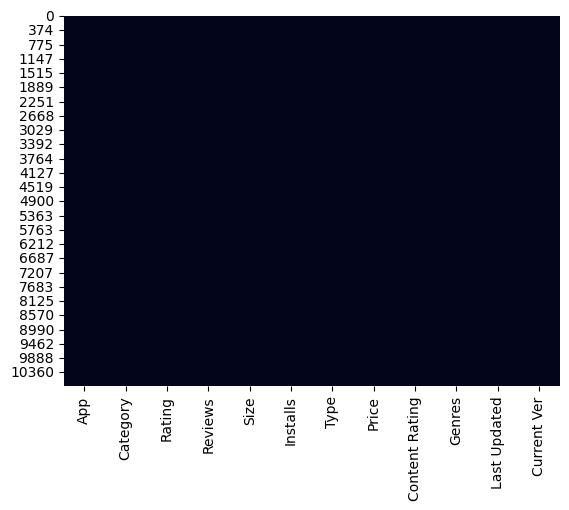

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=False)

Note: We have completely eliminated the rows with missing values from the model to avoid inconsistencies and deviations in the research, hence from the above visualization we determine that there are no missing values throughout the dataset

## Data Exploration and Visualization



In [ ]:
#getting the summary of the dataframe

df.info()

summary = df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
dtypes: float64(1), object(11)
memory usage: 950.6+ KB


In [ ]:
#finding the total rows and columns present on the dataset

df.shape

(9360, 12)

In [ ]:
#retrieving all the columns present on the dataframe
list(df.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver']

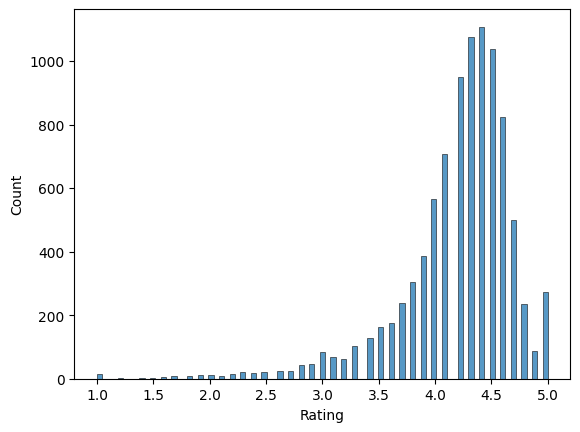

In [ ]:
#Visualizing the composition of different bands of ratings

sns.histplot(df['Rating'])

plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Insights: From the above visualization, we can confirm the major composition of ratings comes from the band 4-5, whereas the poor experience indicating the ratings below 2.5 level are minimal

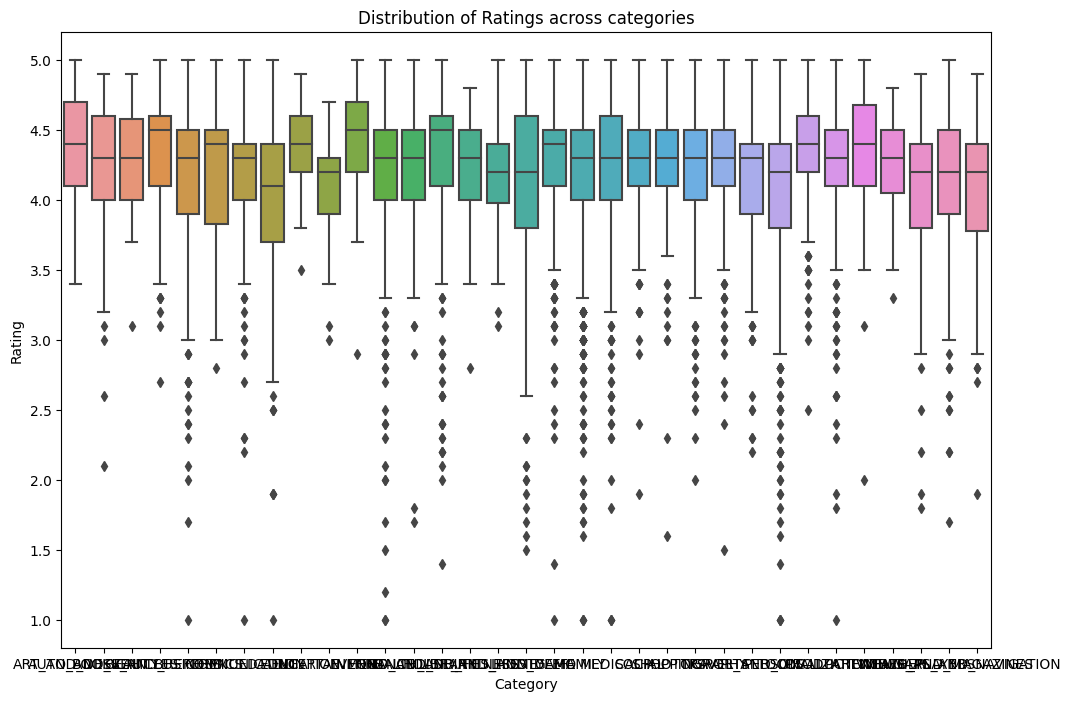

In [ ]:
#Distribution of Ratings across categories

plt.figure(figsize=(12,8))
sns.boxplot(x=df['Category'], y = df['Rating'])

plt.xlabel('Category')
plt.ylabel('Rating')

plt.title('Distribution of Ratings across categories')
plt.show()

In [ ]:
#removing duplicates to perform a cruical analysis

df.drop_duplicates(inplace = True)

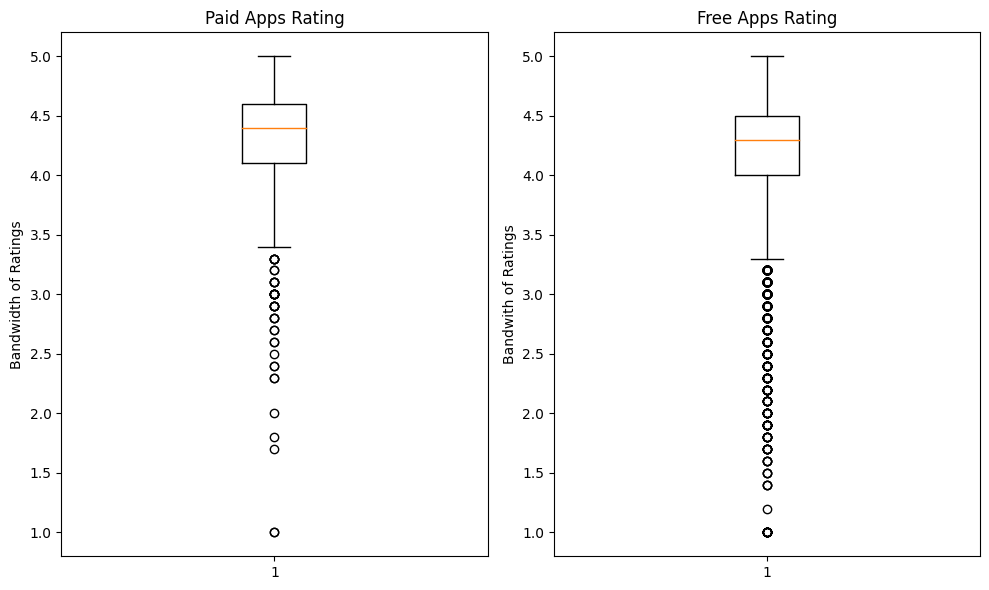

Paid Apps Reviews Statistics:
count    611.000000
mean       4.261702
std        0.557723
min        1.000000
25%        4.100000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64

Free Apps Reviews Statistics:
count    8275.000000
mean        4.182514
std         0.519348
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [ ]:
#Analysis and Visualization on the performance or customer experience(measured via user ratings) of paid vs free applications

selected_features = ['Type', 'Rating']


#Division of data into partition based on Type feature

paid_apps = df[df['Type']=='Paid']
free_apps = df[df['Type']=='Free']

#tagging respective reviews for each type

paid_apps_ratings = paid_apps['Rating']
free_apps_ratings = free_apps['Rating']

paid_apps_stats = paid_apps_ratings.describe()
free_apps_stats = free_apps_ratings.describe()

# Visualization
plt.figure(figsize=(10, 6))

# Boxplot for paid apps reviews
plt.subplot(1, 2, 1)
plt.boxplot(paid_apps_ratings)
plt.title('Paid Apps Rating')
plt.ylabel('Bandwidth of Ratings')


# Boxplot for free apps reviews
plt.subplot(1, 2, 2)
plt.boxplot(free_apps_ratings)
plt.title('Free Apps Rating')
plt.ylabel('Bandwith of Ratings')

plt.tight_layout()
plt.show()

# Print the results
print("Paid Apps Reviews Statistics:")
print(paid_apps_stats)
print("\nFree Apps Reviews Statistics:")
print(free_apps_stats)


Insights:
We have noticed due to larger ratings for 'Free' type apps, the consistency of analysis will be higher. However, in the present scenario, on a smaller margin the paid application have outperfomed free application with 75% of ratings having a score of 4.6.

## Feature Selection

In [ ]:
#Based on our study and realizing the significant impact on ratings, we are selecting the features


features = ['Reviews', 'Size', 'Installs', 'Price']
target = 'Rating'


X= df[features]


Y = df[target]

## Data Splitting

In [ ]:
#Using the train_test_split function from scikit library, we are splitting the data into 4:1 ration, where test_size = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model Selection and Training

In [ ]:
#The Linear Regression is the suitable model to predict the ratings considering the selected features and their linear impact on 'Ratings' of the app
model = LinearRegression()
model.fit(X_train, Y_train)



LinearRegression()

Model Evaluation using Mean Squared Error method

In [ ]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.2161645566361222


In [ ]:
#appending the predicted ratings via a new column to our dataset

df['PredictedRating'] = model.predict(df[features])

# Save the updated dataset with predicted ratings
df.to_csv('your_dataset_with_predictions.csv', index=False)

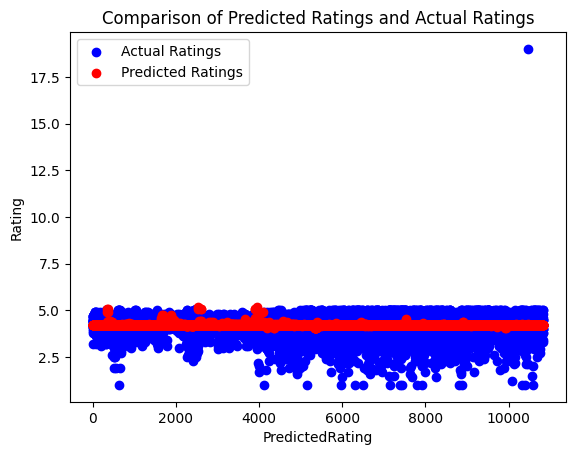

In [ ]:
# Plotting the actual ratings
plt.scatter(df.index, df['Rating'], color='blue', label='Actual Ratings')

# Plotting the predicted ratings
plt.scatter(df.index, df['PredictedRating'], color='red', label='Predicted Ratings')

# Add labels and title to the plot
plt.xlabel('PredictedRating')
plt.ylabel('Rating')
plt.title('Comparison of Predicted Ratings and Actual Ratings')
plt.legend()

# Show the plot
plt.show()